<a href="https://colab.research.google.com/gist/TheoNguyen611/d124ef67f2948ad8b6bf8aef40d66b3f/final_report_g24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project group 24 type 3 : CNN from scratch for CIPHAR 10
___

SZTEJNBERG Guillaume 300151080


NGUYEN Théo 300151392


SUAU Pierre-Nicolas 300150942

<center><a href="https://zupimages.net/viewer.php?id=19/49/xcty.png"><img src="https://zupimages.net/up/19/49/xcty.png" alt="" /></a></center>

# I)  Presentation of the project





The first phase of our work was a documentary research. The main articles consulted are listed in annex. We needed to familiarize ourselves with the design details of convolutional neural networks.
This first phase helped us define the architecture of our code. Our work would be divided in two major steps: the feature learning and the classification. The architecture of the code is simple: the network is composed of layers that perform forward computing and backward propagation. Backward propagation is essential to adjust the weights of the Neural network, in the Classification step and the filters in the Feature Learning step.

<br> <center><a href="https://ibb.co/yVR1bF0"><img src="https://i.ibb.co/V3NZPYV/Capture-d-e-cran-2019-12-04-a-17-42-38.png" alt="Capture-d-e-cran-2019-12-04-a-17-42-38" border="0"></a></center> 
<center>model of our network (picture from toward science)</center><br>

We first built the classification step of the convolutional network. We actually coded and tested a Neural network that would take in the features of images and return the classification of these images, among the ten classes of the data set. Our Neural network performed well with an accuracy reaching almost 50%.

We then built the feature learning step. We decided to use one convolutional layer, followed by a reLu layer and a pooling layer. We first used known filters as the horizontal or vertical filter to test the good functioning of the layers (see pictures). Finally we computed random filters that would be corrected at each backward propagation to become efficient filters, corresponding to the used data set.

<br> <center><a href="https://ibb.co/yVR1bF0"><img src="https://zupimages.net/up/19/49/urr1.png" alt="" /></a></center> 
<center>Picture before and after horizontal filter (and convertion in black and white)</center><br>

We then had to build a layer allowing to convert the feature maps obtained at the end of the feature learning step into information compatible with the Classification step. We therefore built a conversion layer that flattened all the feature maps corresponding to one picture, into a line of the entry matrix, taken in by the Classification step.

Once our convolutional neural network was built we had to test it on Ciphar 10, our chosen data set. We were then confronted to the difficulty of the huge size of the dataset, so that we had to choose interesting parameters for the tests, knowing that each test was a few hours long. With these tests, we understood for instance that the learning rate played an important role in the learning process of the network. Accuracy grew much faster with a learning rate of 0,003 than 0,001.
Finally to reduce the computing time of tests, we reduced our data set to only two possible classes (plane and horse). This allowed us to test different parameters more efficiently.

# Annex:

https://towardsdatascience.com/backpropagation-in-a-convolutional-layer-24c8d64d8509

https://www.quora.com/How-do-we-compute-the-gradient-of-a-ReLU-for-backpropagation

https://www.jefkine.com/general/2016/09/05/backpropagation-in-convolutional-neural-networks/

https://datascience.stackexchange.com/questions/27506/back-propagation-in-cnn

https://www.jefkine.com/general/2016/09/05/backpropagation-in-convolutional-neural-networks/

https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

https://www.kdnuggets.com/2018/04/building-convolutional-neural-network-numpy-scratch.html

https://becominghuman.ai/back-propagation-in-convolutional-neural-networks-intuition-and-code-714ef1c38199



# III)  Presentation of the dataset




Our dataset is CIPHAR10, it is one of the most famous dataset in machine learning. It is composed by 50000 pictures divided into 10 classes (dogs, trucks, airplanes…). Our goal is to be able de to predict the class that each picture belongs to. First, we did our tests with all classes but then we only took 2 of them. Obviously, the chosen features are pixels but we made a choice : we converted all pictures into black and white pictures in order to cut by 3 the size of pictures that go through convolution (the longest process of our algorithm).



# II)  Main Code




In [ ]:
#Execute to have all the toolkits used in the project
import math
import numpy as np
import time
import matplotlib.pyplot as plt

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
#tensorflow is used only to import the cifar 10 dataset
import tensorflow as tf
from tensorflow.keras import datasets
import random 
np.random.seed(42)

TensorFlow 2.x selected.


Our model has the same architecture as tensorflow model. It means that there is one class for each kind of layer (convolution, pooling, relu...). Then there is a class for the model itself which is composed by all the layers that have been chosen.

First, let's define the classes that will implement the CNN's layers. Each layer has two methods : backprop for the backprogration and compute for the forward propagation. Moreover, layers have specific attributes to store data(weight, input/output values...).


###  1) Classification layers

Our first task was to create  MLP layers  from scratch. Therefore, we found after a few searches, the formulas for the "compute" and the "backprop" functions here: https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9

We adapted the code given for our own code. For example , the tutorial on the website computes the prop and the backprop with a bias, and we decided to ignore it at the begining to simplify the problem. Finally, the MLP part consists in a "net layer" (the linear part) and a "relu layer " (the non linear part) 

In [ ]:
""" A generic class from which all the layers inherit."""

class generic_layer():

  def __init__(self,features_size,output_size,example_size):

    #Attributes (used only for the classification layers (Relu and  Net layer))

    #It represents the ouptut of the layer ( for the the classification layer, the
    #output is an example_size*output_size numpy array )
    self.output=0
    #Number of features as input of the layer 
    self.feature_nb=features_size
    #Number of output (must match the number of features of the next layer)
    self.output_nb=output_size
    #Number of examples (basically the number of pictures in the batch)
    self.example_nb=example_size
    
    
  """Computes the forward propagation for any type of layer 
  # Input : a batch of example (a list for the convolution layer and a matrix for 
    the neural network)
  # Returns : list of features maps after convolution (output) and a 
    example_size*output_size numpy array in the classification layers"""

  def compute(self):
    raise NotImplementedError

  # It computes the backpropagation on all features maps.
  # Input : the gradient of the next layer and the learning rate
  # Returns : the gradient of the layer
  def backprop(self,grad,learning_rate):
    raise NotImplementedError



""" It extends the layer class to a layer with relu function for the convolution
# step which aims to introduce a little bit of unlinearity by turning all negative 
#values to 0."""

class relu_layer_mlp(generic_layer):
  # class constructor
  def __init__(self,features_size,output_size,example_size):   
    super().__init__(features_size,output_size,example_size)


  """ It computes the forward propagation through the relu layer 
  #Input: none 
  #Returns: the output of the layer , example_size*output_size matrix"""
  def compute(self):
    # it takes the maximum of 0 and the coefficient for all coefficient in the 
    #matrix
    output=np.maximum(0,self.input)
    return(output)

  """ It computes the forward propagation through the relu layer 
  #Input:none 
  #Returns: the output of the layer , example_size*output_size numpy array"""
  def backprop(self,grad_output,learning_rate): 
    #a matrix of boolean (True if the coefficient of the input matrix is >0,
    # else False)
    relu_grad = self.input > 0
    return grad_output*relu_grad 
 


""" extend the layer class to a layer with a net function, (linear part of the 
neuron) """
class net_layer(generic_layer):

  #class constructor
  def __init__(self,features_size,output_size,example_size):   
    super().__init__(features_size,output_size,example_size)

    #First nitialization of the weights on a normal  probability repartition 
    self.weights=np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(features_size+output_size)), 
                                        size = (features_size,output_size))

  """ It computes the forward propagation through the net layer 
  #Input: none 
  #Returns: the output of the layer , example_size*output_size matrix"""
  def compute(self):

    #check the dimensions of the matrix 
    
    assert len(self.input[0])==self.feature_nb
    

   #It outputs the product of the input matrix with the weight matrix which
   #is  equivalent to calculate the sum  input i*wi for each image example 
    output= np.dot(self.input,self.weights)
   
    return(output)

  """ It computes the backward propagation through the net layer 
  #Input: gradient of the next layer (example_size) 
  #Returns: the output of the layer , example_size*output_size matrix"""
  def backprop(self,grad_output,learning_rate):
        
        #grad input is the specific gradient of the layer 
        #which will be return to ompute the gradient of next (previous) layer
   
        grad_input = np.dot(grad_output, self.weights.T)
        
        #weight correction is a matrix (same shape as the weight matrix) whose 
        # coefficients are the derivative of the loss function with respect to
        # the corresponding weight. 
        weights_correction = np.dot(self.input.T, grad_output)
        
        
        # it corrects the weight with the correction matrix to perform gradient 
        #descent
        self.weights = self.weights - learning_rate * weights_correction
        
        return grad_input 

        

###  2)  feature learning  layers

In a second step we  defined the  layers for the features learning. The **main convolution layer** takes each picture of the batch and apply different filters to create a chosen number of activation map. To simplify the problem, and because the convolution layer requires a lot a CPU, we decided to work in black and white. **A relu layer** add some non-linearity and finally a **pooling layer** has been created. To connect the convolutional part with a classical fully connected layer in the first part, we had to code a **convert layer** to concatenate the different activation map of one picture and transform it into a row of features for the next layer

In [ ]:

"""It extends the layer class to a layer with convolution function."""

class convolution_layer(generic_layer):

  def __init__(self,filters):

    super().__init__(1,1,1)
    self.filters=filters
    self.pictures=0

  """ It computes the convolution on a feature map.
  # Input : the feature map (feature_map) that needs the convolution.
  # Returns : the convoluated feature map (conv_im)."""

  def convolution(self,filt,feature_map):

    # It stores feature map's and filter's shapes.
    map_row=feature_map.shape[0]
    map_col=feature_map.shape[1]
    filt_row=filt.shape[0]
    filt_col=filt.shape[1]

    # It initialises the convoluated feature map to zero.
    conv_im= np.zeros([map_row-filt_row+1,map_col-filt_row+1])

    for i in range(map_row-filt_row+1):

      for j in range(map_col-filt_col+1):

        # It computes and stores the convoluted feature map.
        current_feature_map = feature_map[i:i+filt_row,j:j+filt_col].copy()
        next_feature_map = (feature_map[i:i+filt_row,j:j+filt_col].copy())*filt
        conv_im[i,j]=np.sum(next_feature_map)

    return conv_im

  """ It converts RGB pictures into Black and White pictures.
  # Input : the list of RBG pictures.
  # Output : the list of Black and White pictures."""

  def to_black_and_white(self, pictures):

    # It creates the list of converted pictures.
    conv_pictures=[]

    for picture in pictures:

      pic_row=picture.shape[0]
      pic_col=picture.shape[1]
      dim=picture.shape[2]

      # It initiliases the future converted picture to zero.
      conv_pic= np.zeros([pic_row,pic_col])

      for i in range(pic_row):

        for j in range(pic_col):

          conv_pic[i,j]=1

          for k in range(dim):

            conv_pic[i,j] += -picture[i,j,k]/3
      
      #It stores the converted picture.
      conv_pictures.append(conv_pic)

    return np.array(conv_pictures)
  
  """Computes the convolution.
  # Input : Feature maps after convolution (self.input) and filters (self.filters).
  # Returns : list of features maps after convolution (output)."""

  def compute(self):

    # It stores the filters.
    filters=self.filters

    # It converts pictures into black and white and then stores it.
    self.pictures=self.to_black_and_white(self.input)

    # It stores the numbers of pictures and filters.
    nb_pictures = len(self.pictures)
    nb_filters = len(filters)

    # It stores the picture's shape.
    nb_row_pic, nb_col_pic = self.convolution(filters[0],self.pictures[0]).shape

    output = np.zeros([nb_pictures,nb_filters,nb_row_pic, nb_col_pic])

    for i in range (nb_pictures):

      for j in range (nb_filters):

        # It computes the convolution of the current area of the picture.
        output[i][j] = self.convolution(filters[j],self.pictures[i])
    
    return(output)

  """ Computes the backpropagation for a single feature map.
  # Input : filters (self.filters), the gradient of the next layer (output_gradient),
   the input of the convolution layer (x), the number of the current filter (num_filt) 
   and the learning rate (learning_rate)."""

  def backward(self,output_gradient,x,num_filter,learning_rate):

    # It stores input's, gradient's of the next layer and filter's shapes.
    x_row = x.shape[0]
    x_col = x.shape[1]
    y_row = output_gradient.shape[0]
    y_col = output_gradient.shape[1]
    w_row = self.filters[num_filter].shape[0]
    w_col = self.filters[num_filter].shape[1]
    
    #It initialises the matrix which will sotre the weight correction.
    delta_weight = np.zeros([w_row,w_col])

    for row in range(w_row):

      for col in range(w_col):

        #delta_x[row+w_row,col+w_col] += self.filters[num_filter] * output_gradient[row,col]
        #print("conv-->backward, shape x, row,col,w_row,w_col,output_gradient shape",x.shape, row,col,w_row,w_col,output_gradient.shape)
        # It computes the weight correction.
        delta_weight[row,col] = np.sum(x[row:row+y_row,col:col+y_col] * output_gradient * learning_rate)

    return delta_weight

  """Computes the backpropagation for all feature maps.
  # Input : filters (self.filters), the black and white pictures (self.pictures), 
  the gradient of the next layer (grad), and the learning rate (learning_rate)."""

  def backprop(self,grad,learning_rate):

    # It stores the numbers of pictures and filters.
    nb_pictures, nb_filters = len(self.pictures) , len(self.filters)

    for num_im in range(nb_pictures):

      for num_filter in range (nb_filters):

        # It computes and stores backward propagation for the current feature map.
        self.filters[num_filter] += self.backward(grad[num_im,num_filter],self.pictures[num_im],num_filter,learning_rate)


""" It extends the layer class to a layer with relu function for the convolution 
step which aims to introduce a little bit of unlinearity by turning all negative 
values to 0."""

class relu_layer_conv(generic_layer):

  def __init__(self,nb_pictures,nb_filters):

    super().__init__(1,1,1)

    self.nb_pictures = nb_pictures
    self.nb_filters = nb_filters
  
  """Computes the forward propagation.
  # Input : Feature maps after convolution (self.input).
  # Returns : Output : features mapts after relu, all negative values turned into
   0, positive values go through."""

  def compute(self):
    #print("conv-->relu input",self.input)
    nb_pictures, nb_filters, nb_row_image, nb_col_image = self.input.shape
    output = np.zeros([nb_pictures, nb_filters, nb_row_image, nb_col_image])
    for i in range(nb_pictures) :
      for j in range(nb_filters) :
        output[i,j] = np.maximum(0,self.input[i,j])

    return(output)
        
  """Computes the backward propagation.
  # Input : Feature maps after convolution (self.input), gradient from the next layer 
  (grad_output) and the learning rate (learning_rate).
  # Returns : Layer's gradient matrix (relu_grad), gradient values corresponding 
  to negative input values are turned into 0 and the ones corresponding to positive
   values go through."""

  def backprop(self,grad_output,learning_rate): 

    nb_pictures, nb_filters, nb_row_image, nb_col_image = self.input.shape
    relu_grad = np.zeros([nb_pictures, nb_filters, nb_row_image, nb_col_image])

    for i in range(nb_pictures) :
      for j in range(nb_filters) :
        relu_grad[i,j] = (self.input[i,j] > 0)
        relu_grad[i,j] = relu_grad[i,j]*grad_output[i,j]

    return relu_grad 

""" It extends the layer class to a layer with pooling function which aims to select 
the most significative information 
by choosing the pixel with biggest value in a defined area."""

class pooling_layer (generic_layer):
  def __init__(self,nb_pictures,nb_filters,filt_shape):
    self.filt_shape=filt_shape
    super().__init__(1,1,1)

  """ It computes the pooling on a feature map.
  # Input : the feature map (image) that needs to be pooled.
  # Returns : the pooled feature map (next_feature), a matrix full of zeros 
  # except for the chosen pixels which are worth 1 (it will be useful for the backpropagation). """

  def pooling(self,image,stride=[1,1]):

    # It stores map's and filter's shapes.
    img_row = image.shape[0]
    img_col = image.shape[1]
    filt_row = self.filt_shape[0]
    filt_col = self.filt_shape[1]
    stride_row = stride[0]
    stride_col = stride[1]

    # It initialises the output feature map to zero with the appropriate shape.
    next_feature = np.zeros([(img_row//filt_row),(img_col//filt_col)])

    # It creates a list to store positions of chosen pixels.
    positions = []

    for i in range(0,img_row//filt_row+1,stride_row):

      for j in range(0,img_col//filt_col+1,stride_col):

        if (i+1)*filt_row <= img_row and (j+1)*filt_col <= img_col:

          # It computes the next feature map value.
          next_feature[i][j] = np.max(image[i*filt_row:(i+1)*filt_row,j*filt_col:(j+1)*filt_col])

          # It computes the position of the chosen pixel (the one with the highest value).
          pos = np.argmax(image[i*filt_row:(i+1)*filt_row,j*filt_col:(j+1)*filt_col], axis=None)
          position=[0,0]
          position[0] = pos//filt_row + i*filt_row
          position[1] = pos%filt_col + j*filt_col
          positions.append(position)

    return next_feature,positions

  """" It computes the pooling on all features maps.
  # Input : The list composed by the feature maps (self.input).
  # Returns : The liste composed by the pooled feature maps (output).
  # It also stores the postion of each chosen pixel (self.positions_selected)."""

  def compute(self):

    # It stores features maps' and filter's shapes.
    nb_pictures, nb_filters, nb_row_image, nb_col_image = self.input.shape
    self.positions_selected = np.zeros([nb_pictures, nb_filters, nb_row_image, nb_col_image])

    # It stores output's shape.
    next_nb_row_image,next_nb_col_image = self.pooling(self.input[0,0])[0].shape
    
    # It initialises output to zero.
    output= np.zeros([nb_pictures, nb_filters,next_nb_row_image,next_nb_col_image])


    for i in range(nb_pictures):

      for j in range(nb_filters):

        # It computes the pooled feature maps of the jth feature map of the ith picture.
        output[i,j]=self.pooling(self.input[i,j])[0]
        positions=self.pooling(self.input[i,j])[1]

        for pos in positions:

          self.positions_selected[i,j,pos[0],pos[1]]=1

    return (output)


  """It computes the backpropagation on all features maps.
  # Input : Feature maps after relu (self.input), postions of all the chosen pixels 
    (self.positions_selected) gradient from the next layer (grad_output) and the 
    learning rate (learning_rate).
  # Returns : The list composed by Layer's gradient matrix (pool_grad), gradient 
    values corresponding to unchosen pixels into 0 
    and the ones corresponding to chosen pixels go through."""


  def backprop(self,grad_output,learning_rate):

    # It stores the numbers of feature maps and filters.
    nb_pictures, nb_filters, nb_row_image, nb_col_image = self.positions_selected.shape

    # It stores next feature maps' shape.
    nb_row_output, nb_col_output = grad_output[0,0].shape

    # It stores the filters' shape.
    nb_row_filt, nb_col_filt = nb_row_image//nb_row_output,nb_col_image//nb_col_output

    # It initialises the gradient matrix.
    pool_grad = self.positions_selected.copy()

    for i in range(nb_pictures):

      for j in range(nb_filters):

        for k in range(nb_row_output):

          for l in range(nb_col_output):

            pool_grad[i,j,k*nb_row_filt:(k+1)*nb_row_filt,l*nb_col_filt:(l+1)*nb_col_filt] = self.positions_selected[i,j,k*nb_row_filt:(k+1)*nb_row_filt,l*nb_col_filt:(l+1)*nb_col_filt] * grad_output[i,j,k,l]

    return pool_grad
 


#extend the layer class to a layer with a conversion function from
#the feature learning step to the classification step
class convert_layer(generic_layer):
    
    def __init__(self):   
        super().__init__(1,1,1)
        
    def compute(self):
        output=[]
        #list_matrix contains all the features maps associated to one image. 
        #There are as many feature_maps as the number of filters used in the feature learning step
        for list_matrix in self.input:
            #list_features will contain the features from all the feature_maps
            #associated to one image from the batch
            list_features=[]
            #we go through every pixel of every feature_map and add it to list_features
            for matrix in list_matrix:

                for line in matrix:

                    for value in line:

                        list_features.append(value)
            #Finally each line of features (list_feature) corresponding to one 
            #image of the batch is added to output.
            output.append(list_features)
        
        return np.asarray(output)
    
    """ Computes the backward propagation.
    # Input : Feature maps after feature learning step (self.input), gradient from the next layer (grad_output).
    # Returns : Layer's gradient matrix, here the input gradient values will match the output gradient values.
    #          Only the shape of the storage is changing."""
    def backprop(self,grad_output,learning_rate):
      #first we get the shape of the input of the layer. The output gradient will have the same shape.
        #It computes how many lines a feature_map contains
        length_matrix=len(self.input[0][0])
        #It computes how long is one of these lines.
        length_line_matrix=len(self.input[0][0][0])
        #grad_input will contain the gradient of the feature_maps associated to each image of the batch
        grad_input=[]
        #list_grad_features contain the gradient of all the features associated to one image.
        for list_grad_features in grad_output:
            #list_grad_matrix will contain all the gradient matrices associated to one image.
            list_grad_matrix=[]
            l=list(list_grad_features.copy())
            #Here we go through one line of the output gradient and pop the values
            #into the right matrix into list_grad matrix.
            while l!=[]:

                count_matrix=0
                matrix=[]

                while count_matrix<length_matrix:

                    line_count=0
                    line_grad=[]

                    while line_count<length_line_matrix:

                        line_grad.append(l.pop(0))
                        line_count+=1

                    matrix.append(line_grad)
                    count_matrix+=1

                list_grad_matrix.append(matrix)
            #When list_grad_matrix contains all the gradients associated to one image, 
            #it is added to grad_input.
            grad_input.append(list_grad_matrix)
        
        return np.asarray(grad_input)


# 2) Model definition




Here is the class that we implemented for the model. It contains the main classes for forward and backward propagation, but also the functions to compute the  crossentropy gradient and the acccuracy, the recall, and the precision. 
For the loss function, we tried first the  classical crossentropy described here: https://deepnotes.io/softmax-crossentropy
However, the function was not stable enough ( we got "nan" and "overflow" at the output of the network). That is why we tried another loss function, the log softmax, which has a better numerical stability according to the website:  https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9

In [ ]:
"""General class which represents a configurable CNN model and contains all necessary 
attributes and method to train and predict with a batch of example"""
class model(): 
  #constructor
  def __init__(self,learning_rate,model_type):

    #list of all the layer in a correct order
    self.layers=[]

    #model type is an attribute to know if we test the model with or without convolutional 
    #layer. It is basically useful to know it in the "creat_input" method
    assert ((model_type=="MLP") or (model_type=="CNN")),"Choose a valid model type"
    self.model_type=model_type

    self.output=None
    #current grad stored during the main backpropagagtion. It may have several forms 
    #depending on the class of the current layer
    self.grad=None

    #learning rate of the model 
    self.learning_rate=learning_rate

    #number of correct match found. This attribute is updated during the training 
    # It has to be set to 0 before a prediction and at each epoch
    self.correct_match=0
    
  
  """Function to add a layer to the model
  #input: a layer of any class
  #output: none"""
  def add_layer(self,layer):
    self.layers.append(layer)
  
  """Main function to propagate the batch in input through the CNN.
  #input: train_data is a batch of pictures if the first layer is a convolution, 
  a matrix of flatten pictures if the first layer is a net layer
  #output: none"""
  def propagate(self,train_data):

    input=train_data
    #for each layer, it goes through the "compute function"
    for layer in self.layers:
      #set the input of the layer
      layer.input=np.copy(input)

      #compute the output
      layer.output=layer.compute()
      
      #the output of the layer becomes the input of the next layer
      input=np.copy(layer.output)
     

  """ Main function to propagate backward the gradient in  order to update the weights 
  for the gradient descent.
  #input: none
  #output: none"""
  def main_backprop(self):
    
    # for each layer in a reverse order, calls, the backprop function 
    # which compute the new gradient for the chain rule or/and update weights
    #if the layer has weights
    for i in range(len(self.layers))[::-1]:
      self.grad=self.layers[i].backprop(self.grad,self.learning_rate)
      
      
  """It  computes the accuracy after a forward propagation
  #input: the labels of the batch  that went through the network
  #Returns: none"""
  def accuracy_count(self,batch_labels):

    #get the output of the network as prediction
    prediction=self.layers[-1].output

    #select for each picture of the batch , the class which has the highest 
    #coefficient in the output. Create a vector max_index with those coefficients
    max_index=np.argmax(prediction,axis=1)

    #for each example check if there is a match and update the count
    batch_match=0
    for i in range(len(max_index)):
      if max_index[i]==int(batch_labels[i]):
        batch_match+=1
    #add the number of match for this batch to the total amount of match during 
    #an epoch
    self.correct_match+=batch_match



  """It forecast on a test vector with the current state of the model
  #Input: test data is a vector of pictures, test label is a vector with the label 
  of each picture
  #Returns: the accuracy on the test vector, a list of the precision for all classes, 
  a list of the recall for all classes"""
  def prediction(self,test_data,test_label,class_number):
    #print("\n---prediction:")
    self.propagate(test_data)
    #reset the number of match
    self.correct_match=0
    #update the number of match on the test vector
    self.accuracy_count(test_label)
    accuracy=self.correct_match/len(test_label)


    precision_list=[]
    recall_list=[]
    for class_i in range(class_number):
      precision,recall=self.precision_and_recall(test_data,test_label,class_i)
      precision_list.append(precision)
      recall_list.append(recall)

    print(" \n\n precisions for all classes: "+str(precision_list))
    print("  recall for all classes:"+str(recall_list))
    print("  Accuracy"+str(accuracy))
    return(accuracy,precision_list,recall_list)


  
  """ Function to compute precision and recall for a particular class
  #Input: test data is a vector of pictures, test label is a vector with the label 
  of each picture, class_number is the class on which we want to compute the recall and
  the precision 
  #Returns: the precision and the recall of the class"""
  def precision_and_recall(self,test_data,test_label,class_number_i):
   
    #initializes indicators

    correct_match_class_i=0 #number of True Positive
    predicted_as_i=0 #number of 
    number_of_element_i=0
    #update the number of match on the test vector
    #get the output of the network as prediction
    prediction=self.layers[-1].output

    #select for each picture of the batch , the class which has the highest 
    #coefficient in the output. Create a vector max_index with those coefficients
    max_index=np.argmax(prediction,axis=1)
    #print("max_index: ", max_index)

    
    for j in range(len(max_index)):
      if max_index[j]==class_number_i:
        predicted_as_i+=1
        if max_index[j]==int(test_label[j]):
          correct_match_class_i+=1
      if int(test_label[j])==class_number_i:
        number_of_element_i+=1
    if(predicted_as_i==0 or number_of_element_i==0):
      precision,recall=0,0
    else:
      precision=correct_match_class_i/predicted_as_i
      recall=correct_match_class_i/number_of_element_i
    print("  Class: "+ str(class_number_i) +" Correct match:"+ str(correct_match_class_i)
    +" Number of elements:"+ str(number_of_element_i)+" Forecast as i:"+  str(predicted_as_i))
    
    return(precision,recall)



  """ Main function to train the model. It executes a forward propagation,
  computes the crossentropy and executes a backward propagation to update weights
  #Input:train_batch is a batch of pictures if the first layer is a convolution, 
  a matrix of flatten pictures if the first layer is a net layer. train_label is
  a vector of the corresponding labels
  #Returns: the accuracy on the test vector"""
  def fit(self,train_batch,train_label):

    #first propagation in the network
    self.propagate(train_batch)
    #update the number of match
    self.accuracy_count(train_label)
    
    #backpropagation in the network to update weights
    self.grad=self.grad_crossentropy(self.layers[-1].output,train_label)
    
    self.main_backprop()
    
  """ This function computes the gradient of the crossentropy after a forward propagation
  #Input: network_outptut is the output of the last layer (prediction), 
  reference_answers is a vector with the number of each picture's class
  #Returns: an matrix example_size*output_size where each coeeficient represents the derivative 
  of the crossentropy with respect to the corresponding ouptut for the corresponding 
  picture of the batch
  code adapted from: https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9
  """
  def grad_crossentropy(self,layer_output,reference_answers):
    
    #ones_for_answers is a matrix where a coefficient aij is equal to 
    #one if the neural network forecast that the ith example is of class j
    ones_for_answers = np.zeros_like(layer_output)
    ones_for_answers[np.arange(len(layer_output)),reference_answers.astype(int)] = 1
    
    #compute the softmax function
    softmax = np.exp(layer_output) / np.exp(layer_output).sum(axis=-1,keepdims=True)
    #return the gradient of the softmax
    return (- ones_for_answers + softmax) / layer_output.shape[0]
  
   
  
  """ This function creates mini batches of the desired size to feed the model. 
  The set of mini-batches covers all the given train datas. The order to pick the 
  pictures from the train set is random.
  #Input: "images" is an array of pictures (number of samples x 32x32x3), "labels" 
  a vector with the labels,  "batch_size" is the number of sample by batch, "shuffle"
  is a boolean which is True if we want to suffle simultaneously the images and their
  labels.
  #Returns: a list of batch and a list with the labels of each batch in the same order 
  If the model is a CNN, then a batch is an array of picture, if the model is 
  a MLP, a batch is a matrix of size number of batch x 3"""

  def create_input(self,images, labels, batch_size,shuffle):
    #get the length of the train data
    len_data=len(images)
    #If the batch size doesn't divide the number of pictures, we parse less images 
    len_data_parsed=len_data-(len_data%batch_size)

    #count the total number of pixel in an image to get the exact feature number
    #if the model is an MLP
    feature_nb=1
    for i in images[0].shape:
      feature_nb=feature_nb*i


    if shuffle:
      #create a list of index to permute the images in the parsed datas. 
      index_list=random.sample(range(len(images)),len_data_parsed)
    else: 
      index_list=range(len_data_parsed)

    #create an empty batch with correct dimensions
    batch=None
    if(self.model_type=="MLP"):
      batch=np.zeros((batch_size,feature_nb))
    if(self.model_type=="CNN"):
      batch=np.empty((batch_size,)+images[0].shape)
    
    #create an empty batch_label array with the correct dimensions
    batch_label=np.zeros(batch_size)


    batch_label_list=[]
    batch_list=[]
    row=0

    #Following the shuffled index list, pick the number of images wanted to form 
    #the first batch, and so on... 
    for i in index_list:

      #in the case of a MLP, an image is flatten into features
      if(self.model_type=="MLP"):
        batch[row][:]=images[i].flatten()
        
      #in the case of a CNN , the input is directly a batch of image
      if(self.model_type=="CNN"):
        batch[row]=images[i]

      #the labels are also organized in batches
      batch_label[row]=labels[i]  
      row+=1

      #eachh time  the batch is full, go to the next batch
      if row==batch_size:
        curr_batch=np.copy(batch)
        curr_label=np.copy(batch_label)
        batch_list.append(curr_batch)
        batch_label_list.append(curr_label)
        row=0
    
    return(batch_list,batch_label_list)


   
  """ This function initializes the filters of the convolution layer with random numbers
  #input: The number of filters and their size
  #returns: a list with all the filters initialized"""
  def create_filters(self,nb_filters, size_filter):
    list_filters=[]
    for i in range(nb_filters):
        filter=np.zeros((size_filter, size_filter))
        for j in range(size_filter):
            for k in range(size_filter):
                filter[j][k]=random.random()
        list_filters.append(filter)
    return list_filters

  
  



# IV) Model testing on CIFAR 10 


We need first to download  and normalize the data set:


In [ ]:

import random 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



170500096/170498071 [==============================] - 4s 0us/step


## 1) Test of the Multilayer Perceptron

We tested first the model as MLP ( only fully connected layers). Here is a model with the optimal parameters that we found after a few searches. As you can see,  we reach sometimes 30% of accuracy after 10 epochs, which is not bad, considering that the images are flatten, so features are not processed at the input. 
When analyzing the results further, we can see that over epochs, some classes have zero match! It means that the MLP fails on some classes that it is not able to identify, maybe because of the lack of feature processing. That is why the accruacy is low, while precision/recall on some classes are not bad


-------------- Epoch:0--------------

  Class: 0 Correct match:148 Number of elements:1000 Forecast as i:1461
  Class: 1 Correct match:0 Number of elements:1000 Forecast as i:0
  Class: 2 Correct match:0 Number of elements:1000 Forecast as i:0
  Class: 3 Correct match:3 Number of elements:1000 Forecast as i:21
  Class: 4 Correct match:0 Number of elements:1000 Forecast as i:0
  Class: 5 Correct match:970 Number of elements:1000 Forecast as i:8518
  Class: 6 Correct match:0 Number of elements:1000 Forecast as i:0
  Class: 7 Correct match:0 Number of elements:1000 Forecast as i:0
  Class: 8 Correct match:0 Number of elements:1000 Forecast as i:0
  Class: 9 Correct match:0 Number of elements:1000 Forecast as i:0
 

 precisions for all classes: [0.10130047912388775, 0, 0, 0.14285714285714285, 0, 0.11387649683024184, 0, 0, 0, 0]
  recall for all classes:[0.148, 0, 0, 0.003, 0, 0.97, 0, 0, 0, 0]
  Accuracy0.1121
ACCURACY ON TEST SET:  0.1121
ACCURACY ON TRAIN SET  0.1024

-------------- Epo

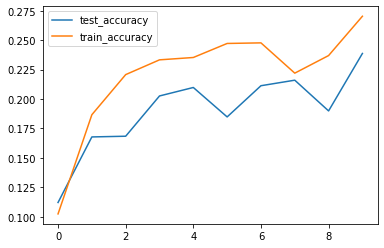

In [ ]:

"""Test of the  MLP """
np.random.seed(42)

#define the model with an appropriate learning rate and 5 layers
Network=model(0.1,"MLP")
layer1=net_layer(3072,100,10)
layer2=relu_layer_mlp(100,100,10)
layer3=net_layer(100,10,10)
layer4=relu_layer_mlp(10,10,10)
layer5=net_layer(10,10,10)

Network.add_layer(layer1)
Network.add_layer(layer2)
Network.add_layer(layer3)
Network.add_layer(layer4)
Network.add_layer(layer5)


test_accuracy_list=[]
train_accuracy_list=[]

#creates a huge batch with all the test data (for the prediction)
test_list,test_labels_list=Network.create_input(test_images, test_labels, len(test_labels),False)

#Iterate over the epocs
for epoch in range (10):
  print("\n-------------- Epoch:"+str(epoch)+"--------------\n")
  #create a new batch list at each epoch
  batch_list,batch_labels_list=Network.create_input(train_images, train_labels, 10,False)
  #train the network for each batch
  for b,l in zip(batch_list,batch_labels_list):
    Network.fit(b,l)
  #Compute the accuracy on train set
  train_accuracy=Network.correct_match/len(train_labels)
  train_accuracy_list.append(train_accuracy)

  #Compute the accuracy, precision, recall  on test set
  Network.correct_match=0
  test_accuracy,precision,recall=Network.prediction(test_list[0],test_labels_list[0],10)
  test_accuracy_list.append(test_accuracy)
  print("ACCURACY ON TEST SET: ", test_accuracy)
  print("ACCURACY ON TRAIN SET ", train_accuracy)
  
#plot the results
plt.plot(range(10),test_accuracy_list,label="test_accuracy")
plt.plot(range(10),train_accuracy_list,label="train_accuracy")
plt.legend(loc='best')



## 2) Test of the  CNN

Here is an relatively efficient architecture that we found fot the CNN. We tried another  architecture with 32 filters but even if it was efficient, the process was too long to be able to optimize it (6h for an epoch). In this [website](https://https://www.tensorflow.org/tutorials/images/cnn?fbclid=IwAR3mSGlmGEbMqNltwc0u2rA_HiyrL4X5SiT0fHSS-990WxQY0Ru9NSaFORA), they even tried with 64 filters, on two convolution layers but we are not able to do it with our basic model  wich was not build for this purpose.

CAUTION: The next cell needs about 40 min to complete one epoch!


-------- Epoch:0--------

Execution time :0.9316229820251465 batch: 0
Network accuracy 0.0
Execution time :240.98727798461914 batch: 500
Network accuracy 0.10978043912175649
Execution time :482.58077335357666 batch: 1000
Network accuracy 0.11398601398601399
Execution time :724.4053840637207 batch: 1500
Network accuracy 0.1211858760826116
Execution time :965.8223648071289 batch: 2000
Network accuracy 0.1256871564217891
Execution time :1207.250113248825 batch: 2500
Network accuracy 0.13114754098360656
Execution time :1448.1231153011322 batch: 3000
Network accuracy 0.13492169276907698
Execution time :1689.2882549762726 batch: 3500
Network accuracy 0.13710368466152528
Execution time :1930.7479183673859 batch: 4000
Network accuracy 0.1379655086228443
Execution time :2171.6743063926697 batch: 4500
Network accuracy 0.13879137969340147
Execution time: 2412.1989467144012 secondes ---
accuracy on train_set 0.14154
  Class: 0 Correct match:63 Number of elements:103 Forecast as i:439
  Class: 1 C

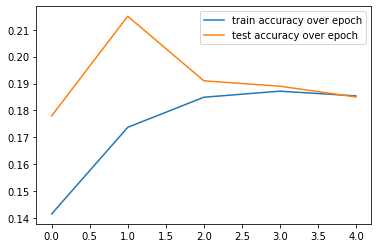

In [ ]:
np.random.seed(42)
# define the model 
CNNetwork=model(0.003,"CNN")
filters_list=CNNetwork.create_filters(5,3)
layer1=convolution_layer(filters_list)
layer2=relu_layer_conv(10,5)
layer3=pooling_layer(10,5,[5,5])
layer4=convert_layer()
layer5=net_layer(180,10,10)
layer6=relu_layer_mlp(10,10,10)

CNNetwork.add_layer(layer1)
CNNetwork.add_layer(layer2)
CNNetwork.add_layer(layer3)
CNNetwork.add_layer(layer4)
CNNetwork.add_layer(layer5)
CNNetwork.add_layer(layer6)

#create the input for the test set 
test_list,test_labels_list=CNNetwork.create_input(test_images, test_labels, len(test_labels),True)
start_time=time.time()

accuracy_train_epoch_list=[]
accuracy_test_epoch_list=[]
#iterate over the epoch
for epoch in range (5):
  print("\n-------- Epoch:"+str(epoch)+"--------\n")
  
  #create the batch list for the training
  batch_list,batch_labels_list=CNNetwork.create_input(train_images, train_labels, 10,True)
  
  
  counter=0
  accuracy_list=[]
  batch_number_list=[]
  
  #train for each batch
  for b,l in zip(batch_list,batch_labels_list):
    accuracy_list=[]
    batch_number_list=[]
    # because the process can be long, we print  and  record every 500 batch the 
    #time  and the accuracy on the all the batches that went into the network for now
    
    if counter%500==0:
      curr_accuracy=CNNetwork.correct_match/((counter+1)*10)
      print("Execution time :"+ str( (time.time() - start_time))+" batch: "+str(counter))
      print("Network accuracy", curr_accuracy)
      batch_number_list.append(counter)
      accuracy_list.append(curr_accuracy)

    counter+=1

    #train the model
    CNNetwork.fit(b,l)

  
  
  print("Execution time: %s secondes ---" % (time.time() - start_time))

  train_set_accuracy=CNNetwork.correct_match/len(train_labels)
  print("accuracy on train_set",train_set_accuracy)
  accuracy_train_epoch_list.append(train_set_accuracy)
  CNNetwork.correct_match=0
  test_accuracy,precision,recall=CNNetwork.prediction(test_list[0][::10],test_labels_list[0][::10],10)
  print("accuracy on test_set", test_accuracy)
  accuracy_test_epoch_list.append(test_accuracy)
  CNNetwork.correct_match=0

  print("Execution time: %s secondes ---" % (time.time() - start_time))

#plot the results

plt.plot(range(5),accuracy_train_epoch_list,label="train accuracy over epoch")
plt.plot(range(5),accuracy_test_epoch_list,label="test accuracy over epoch")
plt.legend(loc='best')


## 3) Test on two classes





In [ ]:

"""Preparation of a two class dataset"""
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# prepare the train data 

train_images_sorted = [[] for k in range(10)]
train_labels_sorted = [[] for k in range(10)]

for k in range(len(train_images)):
  nb_class = train_labels[k][0]
  train_images_sorted[nb_class].append(train_images[k])
  train_labels_sorted[nb_class].append(train_labels[k][0])



train_images_airplane = train_images_sorted[0]
train_labels_airplane = train_labels_sorted[0]
train_images_horse = train_images_sorted[5]
train_labels_horse = train_labels_sorted[5]

#replace the name of label 7 by 1
for k in range(len(train_labels_horse)):
  train_labels_horse[k]=1

train_images_2=np.array(train_images_airplane+train_images_horse)
train_labels_2=np.array(train_labels_airplane+train_labels_horse)


# prepare the test data

test_images_sorted = [[] for k in range(10)]
test_labels_sorted = [[] for k in range(10)]

for k in range(len(test_images)):
  nb_class = test_labels[k][0]
  test_images_sorted[nb_class].append(test_images[k])
  test_labels_sorted[nb_class].append(test_labels[k][0])


test_images_airplane = test_images_sorted[0]
test_labels_airplane = test_labels_sorted[0]
test_images_horse = test_images_sorted[5]
test_labels_horse = test_labels_sorted[5]

#replace the name of label 7 by 1
for k in range(len(test_labels_horse)):
  test_labels_horse[k]=1


test_images_2=np.array(test_images_airplane+test_images_horse)
test_labels_2=np.array(test_labels_airplane+test_labels_horse)



"""Test of the CNN with 2 outputs"""

CNNetwork2=model(0.003,"CNN")
filters_list=CNNetwork2.create_filters(5,3)
layer1=convolution_layer(filters_list)
layer2=relu_layer_conv(10,5)
layer3=pooling_layer(10,5,[5,5])
layer4=convert_layer()
layer5=net_layer(180,2,10)
layer6=relu_layer_mlp(2,2,10)

CNNetwork2.add_layer(layer1)
CNNetwork2.add_layer(layer2)
CNNetwork2.add_layer(layer3)
CNNetwork2.add_layer(layer4)
CNNetwork2.add_layer(layer5)
CNNetwork2.add_layer(layer6)

#create the input for the test set 
test_list2,test_labels_list2=CNNetwork2.create_input(test_images_2, test_labels_2, len(test_labels_2),True)

start_time=time.time()


#iterate over the epoch
for epoch in range (3):
  print("\n-------- Epoch:"+str(epoch)+"--------\n")
  
  #create the batch list for the training
  batch_list2,batch_labels_list2=CNNetwork2.create_input(train_images_2, train_labels_2, 10,True)
  
  #train for each batch
  counter=0
  accuracy_list=[]
  batch_number_list=[]
  for b,l in zip(batch_list2,batch_labels_list2):
    # because the process can be long, we print  and  record every 500 batch the 
    #time  and the accuracy on the all the batches that went into the network for now
    
    if counter%100==0:
      curr_accuracy=CNNetwork2.correct_match/((counter+1)*10)
      print("Execution time :"+ str( (time.time() - start_time))+" batch: "+str(counter))
      print("Network accuracy", curr_accuracy)
      batch_number_list.append(counter)
      accuracy_list.append(curr_accuracy)

    counter+=1

    #train the model
    CNNetwork2.fit(b,l)

  
  
  print("Execution time: %s secondes ---" % (time.time() - start_time))


  print("accuracy on train_set",CNNetwork2.correct_match/len(train_labels_2))
  CNNetwork2.correct_match=0
  test_accuracy,precision,recall=CNNetwork2.prediction(test_list2[0][:1000],test_labels_list2[0][:1000],2)
  print("accuracy on test_set", test_accuracy)
  CNNetwork2.correct_match=0
  print("Execution time: %s secondes ---" % (time.time() - start_time))
 



-------- Epoch:0--------

Execution time :0.3074190616607666 batch: 0
Network accuracy 0.0
Execution time :50.62791299819946 batch: 100
Network accuracy 0.498019801980198
Execution time :101.11337971687317 batch: 200
Network accuracy 0.49502487562189057
Execution time :151.46150255203247 batch: 300
Network accuracy 0.5003322259136213
Execution time :201.70168042182922 batch: 400
Network accuracy 0.5054862842892768
Execution time :252.41843342781067 batch: 500
Network accuracy 0.4994011976047904
Execution time :302.656152009964 batch: 600
Network accuracy 0.4963394342762063
Execution time :353.31227946281433 batch: 700
Network accuracy 0.49586305278174037
Execution time :403.3653964996338 batch: 800
Network accuracy 0.5
Execution time :453.5992875099182 batch: 900
Network accuracy 0.5011098779134295
Execution time: 503.6750690937042 secondes ---
accuracy on train_set 0.504
  Class: 0 Correct match:479 Number of elements:483 Forecast as i:990
  Class: 1 Correct match:6 Number of element

#Conclusion
#Results:
I Neural Network alone with 10 classes. <br>
We had good results when we trained the neural network alone. We reached 23% of accuracy when trained on the 10 classes but it seems to depend a lot of the seed value and it does not work with a shuffle. The recall and the precision rates shows that MLP is not adequate for some classes.   <br><br>

II Whole CNN with 10 classes.<br>
The CNN performed better than random but was less efficient than the neural network alone. We reached at most 20% of accuracy. In addition, recall and precision calculations revealed that some classes are never recognized while others are in most of the cases.<br><br>

III Whole CNN with 2 classes.<br>
We reduced the dataset to two classes, for instance plane and horses. However, after many tests with changing learning rates we didn’t get any improvement on the accuracy. Indeed, it remained very close to 0.5, even after a few epochs.
#Interpretation:
The test phase allowed us to understand the importance of the learning rate definition. The whole CNN with 10 classes seemed to work better with a learning rate of 0.003, while the neural network alone worked well with a learning rate of 0.1. We tried many different rates for the CNN with 2 classes, but none of them gave good results (we even tried to put different learning rates for the different layers!).
At the beginning we didn’t shuffle the dataset between epochs, but knowing that some classes were never recognized (cf II), we finally thought it would be relevant to do so. However, the neural network didn’t train well with the shuffle, while the feature learning step performed as well as before.
While the results are not very satisfying, we are completely satisfied about our work. Our main goal was to understand the deep functioning of a CNN and to implement it from scratch and so we did. We think the results could be improved by increasing the number of filters used and the number of convolution layers.